# Linear Regression
- http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

### Import modules

In [35]:
%matplotlib inline
import numpy
import pandas
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn; seaborn.set(rc = {"figure.figsize":(10,8)})

### Import boston housing dataset

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

### Inspect data

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.data.shape

(506, 13)

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Store data in pandas dataframe

In [14]:
data = pandas.DataFrame(boston.data)

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
data.columns = boston.feature_names

In [17]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Append price target vector to dataframe

In [18]:
data = pandas.concat([data, pandas.Series(boston.target).rename("PRICE")],axis = 1)

In [19]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Create feature matrix and target matrix

In [21]:
X = data.drop("PRICE", axis = 1)
y = data["PRICE"]

In [22]:
X.shape

(506, 13)

In [23]:
y.shape

(506,)

### Instantiate model and fit to data
- Note: no train test split performed in this example

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression(fit_intercept=True)

In [43]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###  View coefficients and intercept
- Note: model result is polynomial

In [27]:
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [28]:
model.intercept_

36.49110328036162

### Create pandas dataframe showing coefficient values against feature names

In [29]:
coefficients_table = pandas.concat([pandas.Series(boston.feature_names).rename("FEATURE_NAMES"),
                                   pandas.Series(model.coef_).rename("COEFFICIENTS")], axis = 1)

In [30]:
coefficients_table

,FEATURE_NAMES,COEFFICIENTS
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Prediction

In [56]:
test_me = numpy.array([0.004,
                       19.0,
                       4.31,
                       0.0,
                       0.538,
                       6.575,
                       65.2,
                       4.0900,
                       1.0,
                       296.0,
                       15.3,
                       396.90,
                       4.98])

In [57]:
model.predict(test_me[numpy.newaxis,:])

array([30.09657703])

### Visualize rooms per dwelling against price

Text(0,0.5,'price')

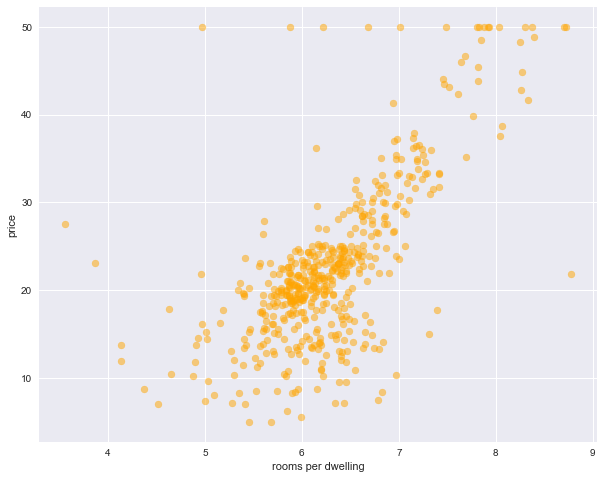

In [58]:
plt.scatter(data.RM, data.PRICE, color = "orange", alpha = 0.5)
plt.xlabel("rooms per dwelling")
plt.ylabel("price")